# Wstęp do uczenia maszynowego - laboratorium 5

### Klasyfikacja - regresja logistyczna, maszyna wektorów nośnych (SVM)

### **Uczenie modelu** w sklearn - przypomnienie

Wszystkie modele w scikit-learn to obiekty klas posiadających metodę **fit**() - tzw. Estimator API.
Dla danej klasy modelu trening wygląda następująco:

```
from sklearn.XXX import KlasaModelu

model = KlasaModelu(hiperparametry)

# uczenie bez nadzoru
model.fit(cechy_zbioru_uczącego)

# uczenie z nadzorem
model.fit(cechy_zbioru_uczącego, etykiety_zbioru_uczącego)
```

### **Klasyfikacja** w sklearn - przypomnienie

Mając wytrenowany model możemy sprawdzić, jak poradzi sobie z danymi spoza zbioru uczącego.

Używamy do tego funkcji model.**predict**(). Funkcja ta zwraca tzw. predykcje modelu.

```
 predykcje = model.predict(cechy_zbioru_testowego)
```

Do oceny jakości predykcji modeli używamy różnych miar liczbowych (ang. metrics) - więcej niebawem na wykładzie.

Najprostsza z nich to dokładność (ang. accuracy), która porównuje klasy predykcji z klasami etykiet i mówi, ile procent klas predykcji zgadza się z etykietami.

```
from sklearn.metrics import accuracy_score
accuracy_score(predykcje, etykiety_testowe)
```
lub
```
model.score(cechy_testowe, etykiety_testowe)
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Ćwiczenie

Wczytaj dane ze zbioru `digits` wbudowanego w sklearn. Zapoznaj się ze zbiorem danych i podziel go na zbiór uczący i testowy (20%).

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Get dataset info
print(load_digits().DESCR)

# Get dataset labels
print(load_digits().feature_names)

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Ćwiczenie

Uzupełnij poniższą komórkę (zastąp wystąpienia `None` odpowiednim kodem), a następnie wykorzystaj funkcję `plot_n_examples`, aby zwizualizować pierwsze 10 cyfr (wierszy) ze zbioru `digits` jako kwadratowe obrazki.

In [3]:
def plot_n_examples(X: np.array, y: np.array, n_first_rows: int, size: int):
    plt.figure(figsize=(10, 6))
    for index, (image, label) in enumerate(zip(X[:n_first_rows], y[:n_first_rows])):
        plt.subplot(2, n_first_rows//2+1, index + 1)
        plt.imshow(np.reshape(image, (size, size)), cmap=plt.cm.gray)
        plt.title('Label: %s\n' % label, fontsize = 10, pad = -20)
        plt.axis('off')

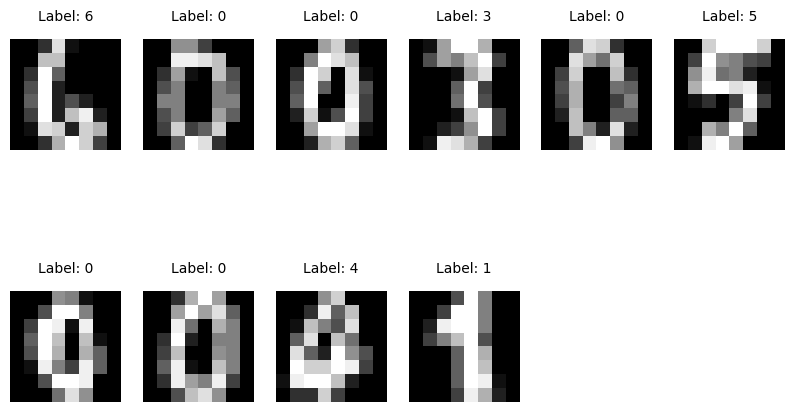

In [4]:
plot_n_examples(X=X_train, y=y_train, n_first_rows=10, size=8)

### Ćwiczenie

Wytrenuj model regresji logistycznej (`LogisticRegression` z `sklearn.linear_model`) na zbiorze `digits` i sprawdź jego dokładność.

(Aby uniknąć warningu, ustaw argument max_iter=10000).

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

regr = LogisticRegression(max_iter=10000)

# Supervised trining of the model

regr.fit(X=X_train, y=y_train)

pred = regr.predict(X=X_test)
print(pred.shape)
print(y_test.shape)

acc = accuracy_score(y_true=y_test, y_pred=pred)
print(f'Accuracy: {acc}')

(360,)
(360,)
Accuracy: 0.9722222222222222


In [6]:
predictions = pred

index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        misclassified_images.append(index)
    index +=1

### Ćwiczenie

Uzupełnij poniższą komórkę (zastąp `None` właściwym kodem), aby znaleźć indeksy wierszy błędnie sklasyfikowanych.

### Ćwiczenie

Uruchom poniższą komórkę, aby zobaczyć przykłady błednie sklasyfikowane przez model.

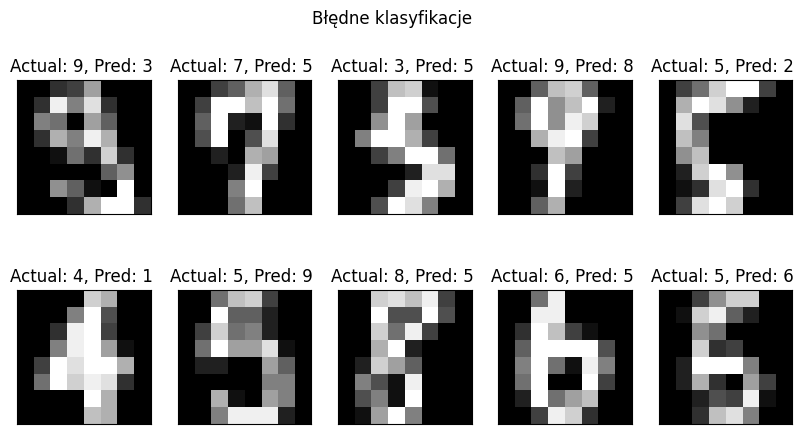

In [7]:
plt.figure(figsize=(10,5))
plt.suptitle('Błędne klasyfikacje')

for plot_index, bad_index in enumerate(misclassified_images):
    p = plt.subplot(2, int(len(misclassified_images)/2), plot_index+1) # 4x5 plot
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray)
    p.set_xticks(())
    p.set_yticks(())
    p.set_title(f'Actual: {y_test[bad_index]}, Pred: {predictions[bad_index]} ')

### Ćwiczenie

Sprawdź, jak poradzi sobie model SVM (klasa `SVC` z `sklearn.svm`) z danymi `digits`. Sprawdź dokładność dla różnych wartości parametru `kernel` na zbiorze uczącym i testowym.

In [8]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

# Prepare the square matrix for the precomputed kernel

kernel_matrix = rbf_kernel(X=X_train, gamma=0.1)

for kernel in SVC._sparse_kernels:
    if kernel == 'precomputed':
        svm_classifier = SVC(kernel=kernel_matrix)
    else:
        svm_classifier = SVC(kernel=kernel)
        svm_classifier.fit(X=X_train, y=y_train)
        pred = svm_classifier.predict(X_test)
        acc = accuracy_score(y_true=y_test, y_pred=pred)

    print(f'{kernel} accuracy: {acc}')

linear accuracy: 0.9777777777777777
poly accuracy: 0.9916666666666667
rbf accuracy: 0.9861111111111112
sigmoid accuracy: 0.9
precomputed accuracy: 0.9


### Zbiory zewnętrzne - OpenML

W scikit-learn można także łatwo ładować zbiory danych z OpenML (https://www.openml.org/). Służy do tego funkcja [`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) dostępna w `sklearn.datasets`.  


### Ćwiczenie

Załaduj zbiór MNIST (https://www.openml.org/d/554) (też cyfry, ale znacznie większy zbiór i lepszej jakości) podając jako argument funkcji `fetch_openml` `data_id=554`.

Zapoznaj się ze zbiorem i dokonaj podziału na zbiór uczący i testowy (10 tysięcy przykładów).

Narysuj histogram dla etykiet z całego zbioru, zbioru uczącego i testowego (`plt.hist(etykiety)`).

In [9]:
from sklearn.datasets import fetch_openml

# Load the dataset and get the description

ds = fetch_openml(data_id=554)
print(ds.DESCR)

/home/zorin/Documents/git/uni/Sem V/Machine-learning/uni_ml/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
# Check data length

print(len(ds['data']))

70000


In [11]:
# Split the dataset with 60K-10K training-testing ratio

X, y = ds['data'], ds['target']

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


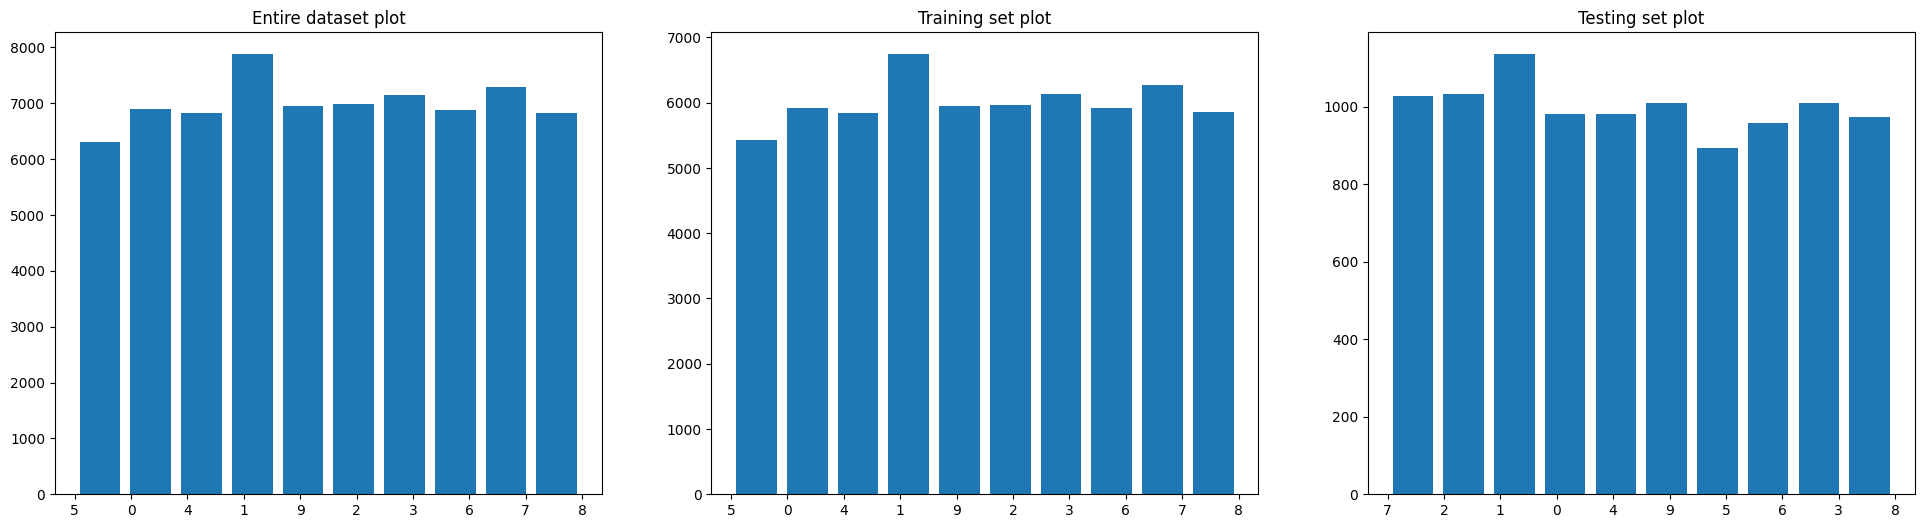

In [12]:
# Draw the histogram

plt.figure(figsize=(24,6))
plt.subplot(1, 3, 1)
plt.hist(y, bins=10, rwidth=0.8)
plt.title('Entire dataset plot')

plt.subplot(1, 3, 2)
plt.hist(y_train, bins=10, rwidth=0.8)
plt.title('Training set plot')

plt.subplot(1, 3, 3)
plt.hist(y_test, bins=10, rwidth=0.8)
plt.title('Testing set plot')

plt.show()

### Ćwiczenie

Wykorzystaj zdefiniowaną wyżej funkcję `plot_n_examples`, aby zwizualizować 5 pierwszych wierszy ze zbioru.

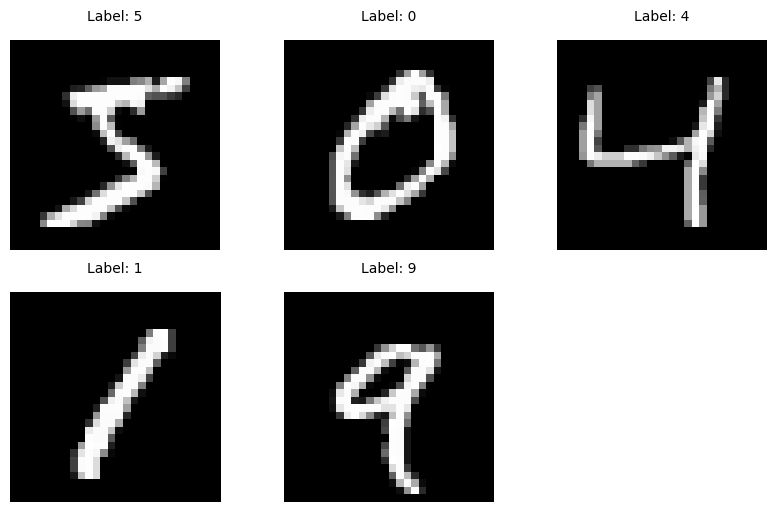

In [13]:
plot_n_examples(X=X.values, y=y.values, n_first_rows=5, size=28)

### Ćwiczenie
Wytrenuj modele regresji logistycznej i SVM (różne wartości hiperparamteru `kernel`), a następnie sprawdź ich dokładność dla zbioru `mnist`.

In [14]:
# Logistic regression training and scoring

regr = LogisticRegression(max_iter=100)
regr.fit(X=X_train, y=y_train)
pred = regr.predict(X=X_test)
acc = accuracy_score(y_true=y_test, y_pred=pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9255


/home/zorin/Documents/git/uni/Sem V/Machine-learning/uni_ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# SVC training and scoring

# Split the data into smaller batches

X_train_split_index = int(X_train.shape[0] / 4)
X_test_split_index = int(X_test.shape[0] / 4)
y_train_split_index = int(y_train.shape[0] / 4)
y_test_split_index = int(y_test.shape[0] / 4)

X_train_chunk, X_test_chunk = X_train[:X_train_split_index], X_test[:X_test_split_index]
y_train_chunk, y_test_chunk = y_train[:y_train_split_index], y_test[:y_test_split_index]

# Train the model and score different kernels

# Prepare train and test data for the precomputed kernel

kernel_train = np.dot(a=X_train_chunk, b=X_train_chunk.T)
kernel_test = np.dot(a=X_test_chunk, b=X_train_chunk.T)

for kernel in SVC._sparse_kernels:
    svm_classifier = SVC(kernel=kernel)
    if kernel == 'precomputed':
        svm_classifier.fit(X=kernel_train, y=y_train_chunk)
        pred = svm_classifier.predict(X=kernel_test)
    else:
        svm_classifier.fit(X=X_train_chunk, y=y_train_chunk)
        pred = svm_classifier.predict(X=X_test_chunk)
    acc = accuracy_score(y_true=y_test_chunk, y_pred=pred)
    print(f'{kernel} accuracy: {acc}')

linear accuracy: 0.8844
poly accuracy: 0.9384
rbf accuracy: 0.9488
sigmoid accuracy: 0.7912
precomputed accuracy: 0.8844


### Ćwiczenie

Załaduj zbiór **Pima Indians Diabetes** (https://www.openml.org/d/37).

Zapoznaj się ze zbiorem i dokonaj podziału na zbiór uczący i testowy (25%). Dokonaj standaryzacji zmiennych.

In [16]:
pima_dataset = fetch_openml(data_id=37)
print(pima_dataset.DESCR)

**Author**: [Vincent Sigillito](vgs@aplcen.apl.jhu.edu)  

**Source**: [Obtained from UCI](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) 

**Please cite**: [UCI citation policy](https://archive.ics.uci.edu/ml/citation_policy.html)  

1. Title: Pima Indians Diabetes Database
 
 2. Sources:
    (a) Original owners: National Institute of Diabetes and Digestive and
                         Kidney Diseases
    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                           Research Center, RMI Group Leader
                           Applied Physics Laboratory
                           The Johns Hopkins University
                           Johns Hopkins Road
                           Laurel, MD 20707
                           (301) 953-6231
    (c) Date received: 9 May 1990
 
 3. Past Usage:
     1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., &
        Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
  

/home/zorin/Documents/git/uni/Sem V/Machine-learning/uni_ml/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
print(len(pima_dataset['data']))
print(len(pima_dataset['data']) * .25) # 25% split for the testing data

768
192.0


In [18]:
# Split the dataset

X, y = pima_dataset['data'], pima_dataset['target']

split_index = int(len(pima_dataset['data']) * .75)

X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]
print(f'{len(X_test)} = {int((len(X_test) / len(X)) * 100)}%')

192 = 25%


In [19]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=X_train)

X_scaled_train = scaler.transform(X=X_train)
X_scaled_test = scaler.transform(X=X_test)

### Ćwiczenie
Porównaj skuteczność modeli regresji logistycznej i SVM (różne kernele) na danych uczących i testowych zbioru dot. cukrzycy u Indian Pima.

In [20]:
regr = LogisticRegression(max_iter=10000)
regr.fit(X=X_scaled_train, y=y_train)
pred = regr.predict(X=X_scaled_test)
acc = accuracy_score(y_true=y_test, y_pred=pred)
print(f'Accuracy: {acc}')

Accuracy: 0.7916666666666666


In [21]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

computed_matrix = rbf_kernel(X=X_scaled_train, gamma=0.2)

for kernel in SVC._sparse_kernels:
    svm_classifier = SVC(kernel=kernel)
    if kernel == 'precomputed':
        svm_classifier.fit(X=computed_matrix, y=y_train)
        pred = svm_classifier.predict(rbf_kernel(X=X_scaled_test, Y=X_scaled_train, gamma=0.2))
    else:
        svm_classifier.fit(X=X_scaled_train, y=y_train)
        pred = svm_classifier.predict(X_scaled_test)
    acc = accuracy_score(y_true=y_test, y_pred=pred)
    print(f'{kernel} accuracy: {acc}')

linear accuracy: 0.7760416666666666
poly accuracy: 0.71875
rbf accuracy: 0.796875
sigmoid accuracy: 0.703125
precomputed accuracy: 0.796875


### Ćwiczenie

Modele liniowe, takie jak m.in. **regresja logistyczna** czy **liniowy SVM** (`kernel='linear'`), mają tę zaletę, że można wprost interpretować wartości parametrów modelu.
Im wyższa wartość (bezwzględna) współczynnika, tym ważniejsza dla decyzji modelu jest odpowiadająca mu zmienna. Jeśli znak współczynnika jest dodatni, to wyższa wartość zmiennej "przybliża" model do przypisania "pozytywnej" klasy. Jeśli znak współczynnika jest ujemny, to im wyższa wartość danej zmiennej, tym bardziej model kieruje się ku przypisaniu "negatywnej" klasy.

Wykorzystaj poniższą funkcję, aby sprawdzić, które zmienne (cechy) najbardziej (i w jaki sposób) wpływają na decyzje modelu dla danych dot. cukrzycy u Indian.

hint: nazwy poszczególnych cech można uzyskać w `zbior_danych.feature_names`, a ich opisy w `zbior_danych.DESCR`

In [22]:
def show_feature_importance(model, labels):
    coeff = list(model.coef_[0])
    features = pd.DataFrame()
    features['features'] = labels
    features['importance'] = coeff
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features['positive'] = features['importance'] > 0
    features.set_index('features', inplace=True)
    features.importance.plot(kind='barh', figsize=(11, 6), color = features.positive.map({True: 'blue', False: 'red'}))
    plt.xlabel('Feature importance')

/home/zorin/Documents/git/uni/Sem V/Machine-learning/uni_ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


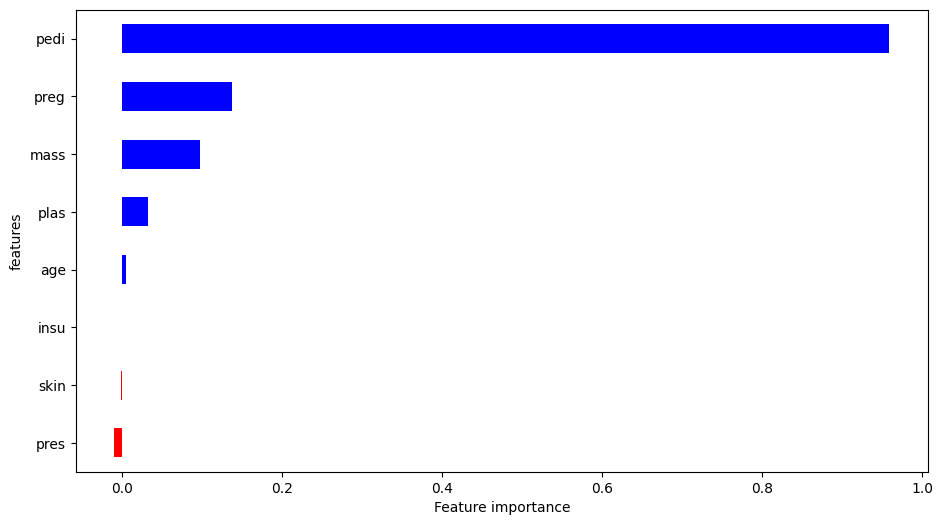

In [23]:
regr = LogisticRegression(max_iter=100)
regr.fit(X=X_train, y=y_train)

show_feature_importance(model=regr, labels=pima_dataset['feature_names'])

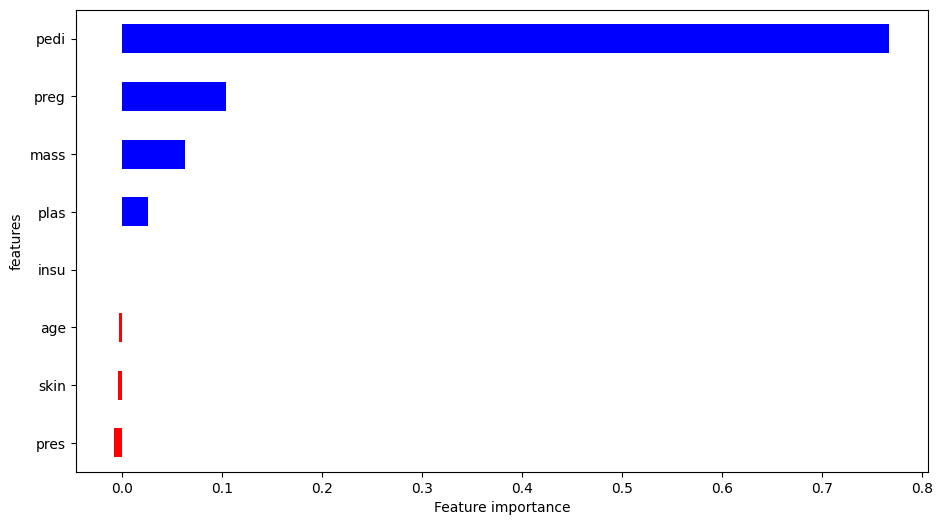

In [24]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X=X_train, y=y_train)

show_feature_importance(model=svm_classifier, labels=pima_dataset['feature_names'])

### Ćwiczenie

Uruchom poniższy kod, aby zobaczyć, jak różne klasyfikatory radzą sobie z różnymi zbiorami danych.

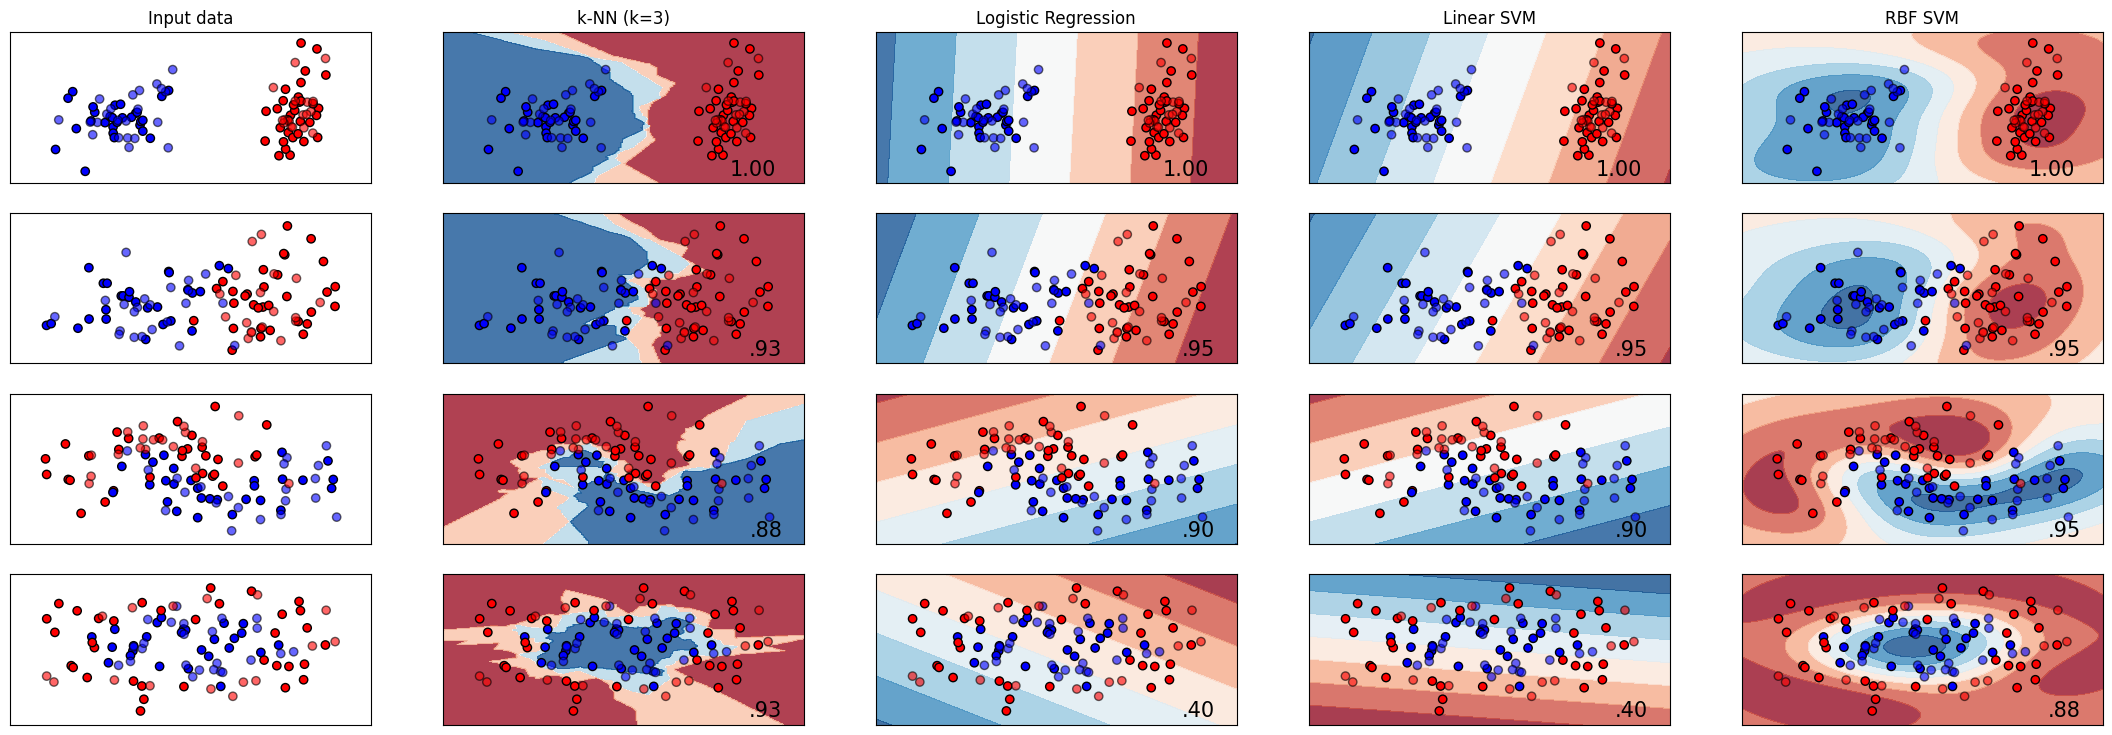

In [25]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X_noise = X + 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
almost_linearly_separable = (X_noise, y)


model_names = ["k-NN (k=3)", "Logistic Regression", "Linear SVM", "RBF SVM"]
classifiers = [KNeighborsClassifier(3), LogisticRegression(), SVC(kernel="linear"), SVC(kernel="rbf")]

datasets = [linearly_separable,
            almost_linearly_separable,
            make_moons(noise=0.4, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
h = .02
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(model_names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.show()
